In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sklearn
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Read spectras from different imaging days
avg_specs_day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day2.csv")
avg_specs_day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day5.csv")
avg_specs_day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day7.csv")
avg_specs_day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day9.csv")


In [ ]:
del avg_specs_day2["image_id"]
del avg_specs_day5["image_id"]
del avg_specs_day7["image_id"]
del avg_specs_day9["image_id"]

In [ ]:
avg_specs_day2["class"] = avg_specs_day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day5["class"] = avg_specs_day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day7["class"] = avg_specs_day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day9["class"] = avg_specs_day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})



In [ ]:
all_specs = pd.concat([avg_specs_day2, avg_specs_day5, avg_specs_day7, avg_specs_day9])

## Day 2 after infestation

In [ ]:
y = avg_specs_day2["class"]
X = avg_specs_day2.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)
print(y_int)
print(le.classes_)

le.inverse_transform(y_int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)



[0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 2 2 3 3 4 4 0
 0 1 1 2 2 3 4 4]
['control' 'drought' 'mites_1t' 'mites_2t' 'mites_4t']


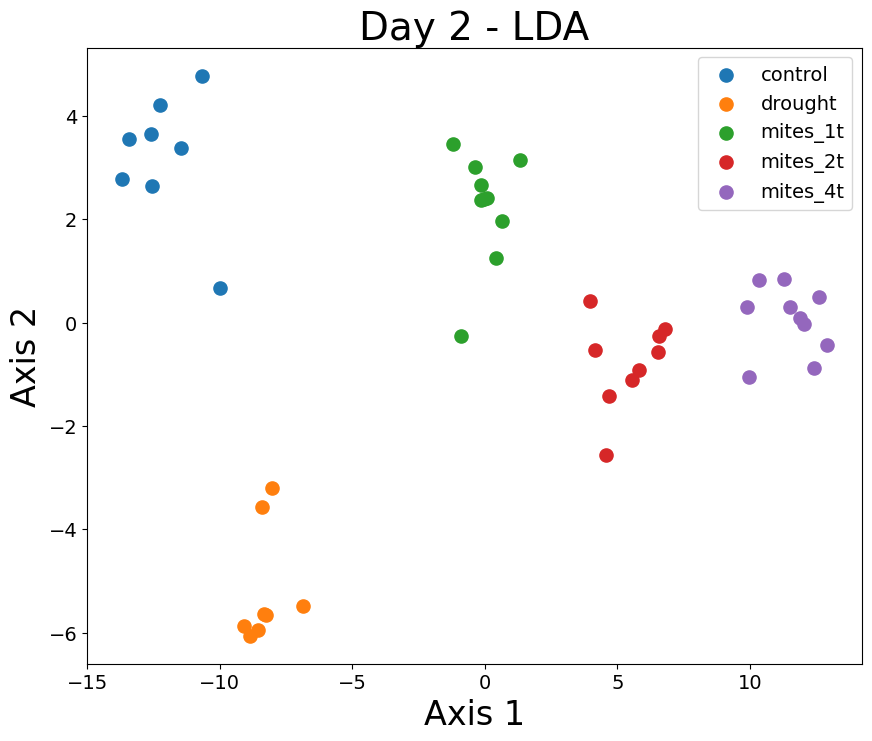

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 2 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day2.png", dpi=400)
plt.show()

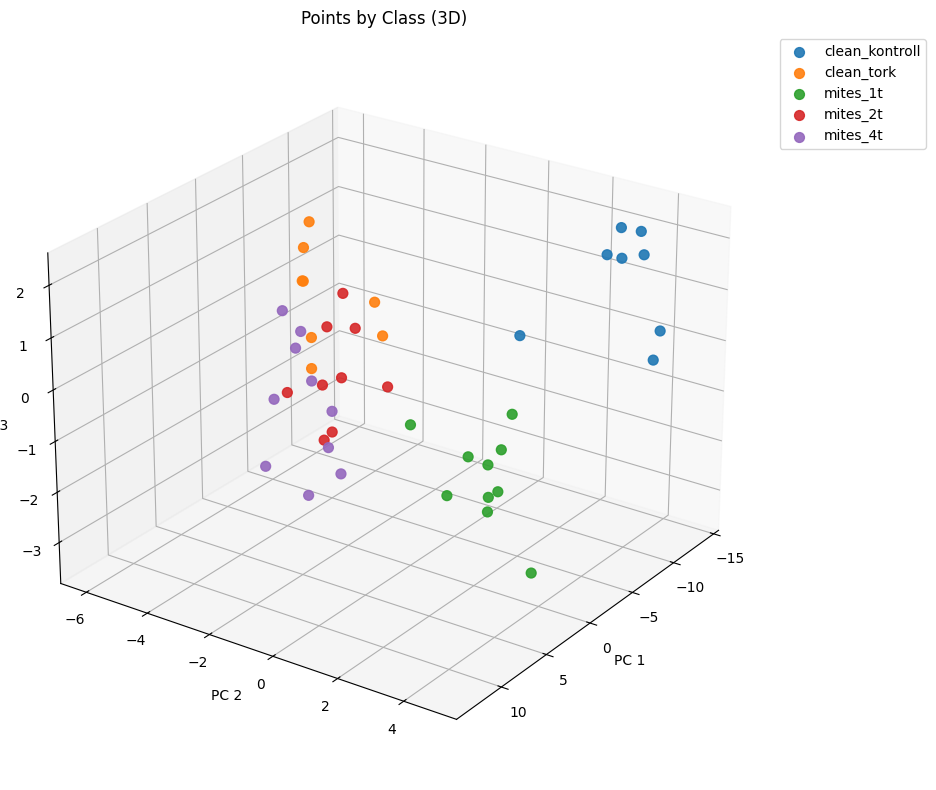

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # not required on modern Matplotlib

# X_pca: shape (n_samples, 3) or more; y_int: integer labels; le: fitted LabelEncoder
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use LabelEncoder's class order to avoid mismatches
class_labels = le.classes_

for class_id in np.unique(y_int):
    pts = X_lda[y_int == class_id, :3]  # PC1–PC3
    ax.scatter(
        pts[:, 0], pts[:, 1], pts[:, 2],
        label=class_labels[class_id],
        s=50,
        # optional: consistent colors across runs
        color=plt.cm.tab10(class_id % 10),
        alpha=0.9
    )

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Points by Class (3D)')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
# Optional: choose a nice viewing angle
ax.view_init(elev=25, azim=35)
plt.show()


## Day 5 after infestation

In [ ]:
y = avg_specs_day5["class"]
X = avg_specs_day5.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)
print(y_int)
print(le.classes_)

le.inverse_transform(y_int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)

[0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 3 3 4 4 2 2 3 3 4 4 0 0
 1 1 2 2 3 3 4 4]
['control' 'drought' 'mites_1t' 'mites_2t' 'mites_4t']


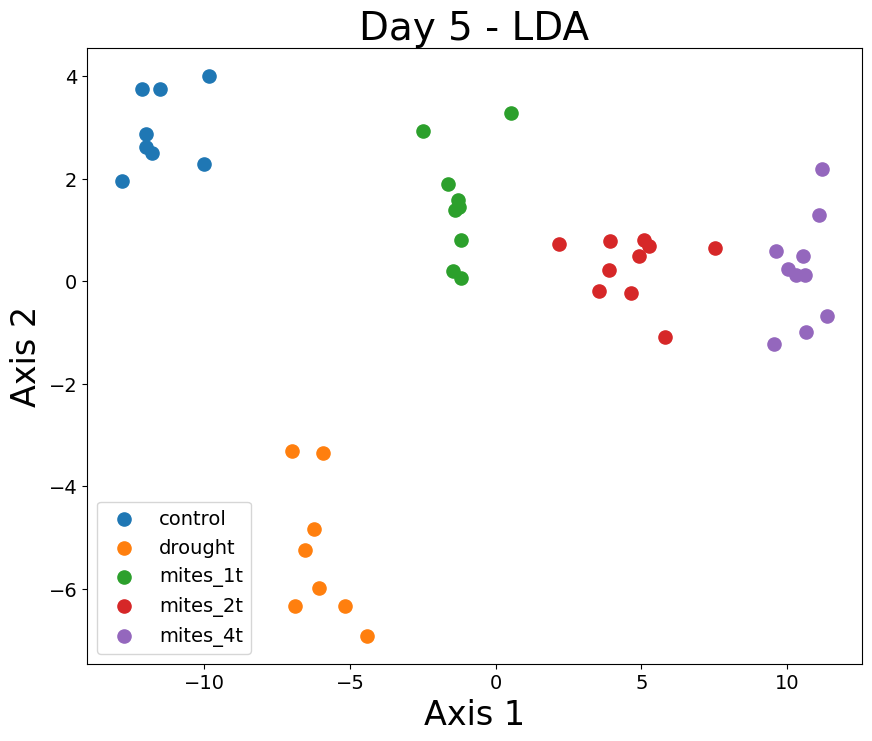

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 5 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day5.png", dpi=400)
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(X_lda[:, :3], columns=['ax1', 'ax2', 'ax3'])
df['class'] = le.inverse_transform(y_int)

fig = px.scatter_3d(
    df,
    x='ax1', y='ax2', z='ax3',
    color='class',
    title='Interactive 3D LDA Scatter',
    symbol='class'
)
fig.show()

## Day 7 after infestation

In [ ]:
y = avg_specs_day7["class"]
X = avg_specs_day7.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)
print(y_int)
print(le.classes_)

le.inverse_transform(y_int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)

[0 0 1 1 2 2 3 4 4 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 2 2 3 3 4 4 0 0 1
 1 2 3 3 4 4]
['control' 'drought' 'mites_1t' 'mites_2t' 'mites_4t']


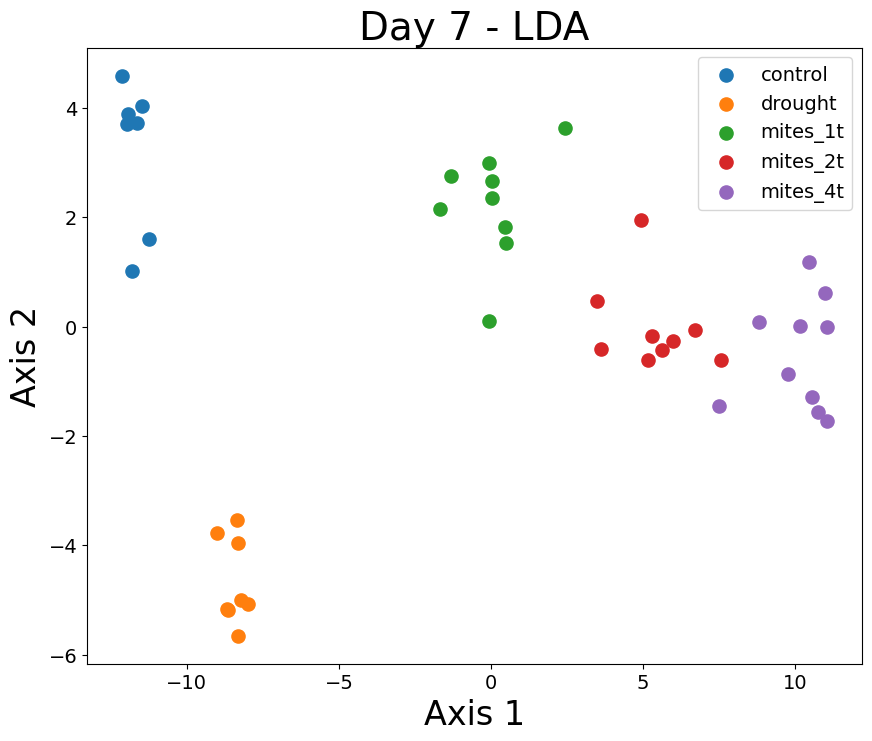

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 7 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day7.png", dpi=400)
plt.show()

## Day 9 after infestation

In [ ]:
y = avg_specs_day9["class"]
X = avg_specs_day9.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)
print(y_int)
print(le.classes_)

le.inverse_transform(y_int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_int)


[0 0 1 1 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 2 2 3 3 4 4 0 0
 1 1 2 2 3 3 4 4]
['control' 'drought' 'mites_1t' 'mites_2t' 'mites_4t']


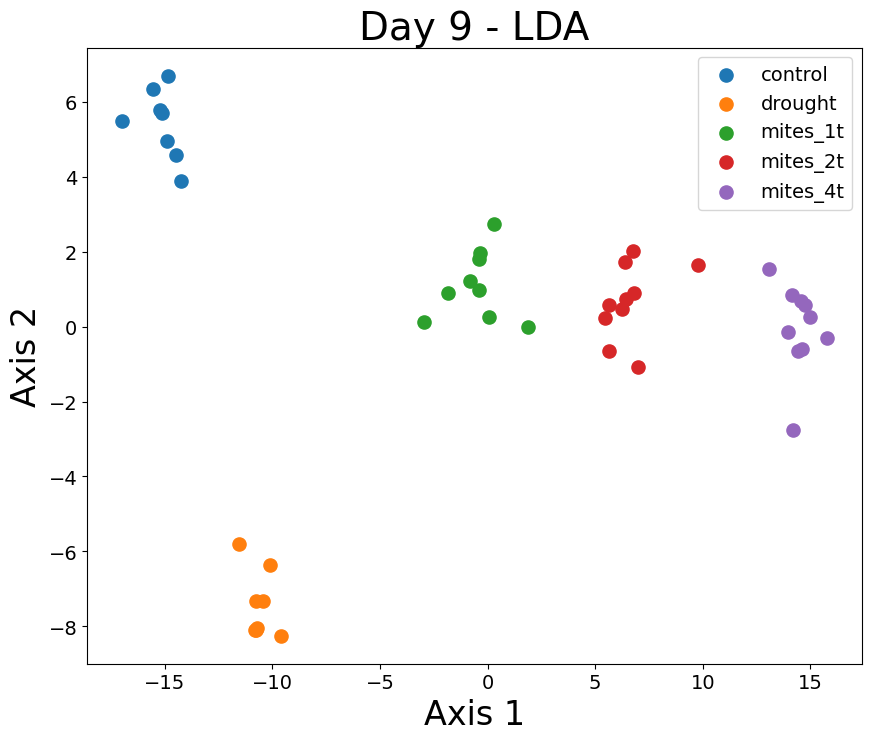

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 9 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day9.png", dpi=400)
plt.show()